In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('seaborn-v0_8-colorblind')
import seaborn as sn

from src.utils.ds_formatter import format_all
from src.dataset import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


F_DATASET = "./data/HT_Sensor_dataset_new.dat"

In [28]:
#Cojo el dataset
# Indicar en la flag si se recalcula o se usa el fichero ya hecho
df = get_dataset(build_dataset=False, time_window=5)
df.head()
model = MLPClassifier()


Esto es considerando también humedad y tiempo

In [29]:
y = df.iloc[:,-1] #obtenemos la columna de las y
x = df.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

             precision    recall  f1-score   support

 background       0.90      0.96      0.93     45297
     banana       0.95      0.90      0.92     52544
       wine       0.94      0.93      0.94     72140

avg / total       0.93      0.93      0.93    169981

             precision    recall  f1-score   support

 background       0.90      0.96      0.93     22504
     banana       0.95      0.91      0.92     25897
       wine       0.94      0.93      0.94     35322

avg / total       0.93      0.93      0.93     83723



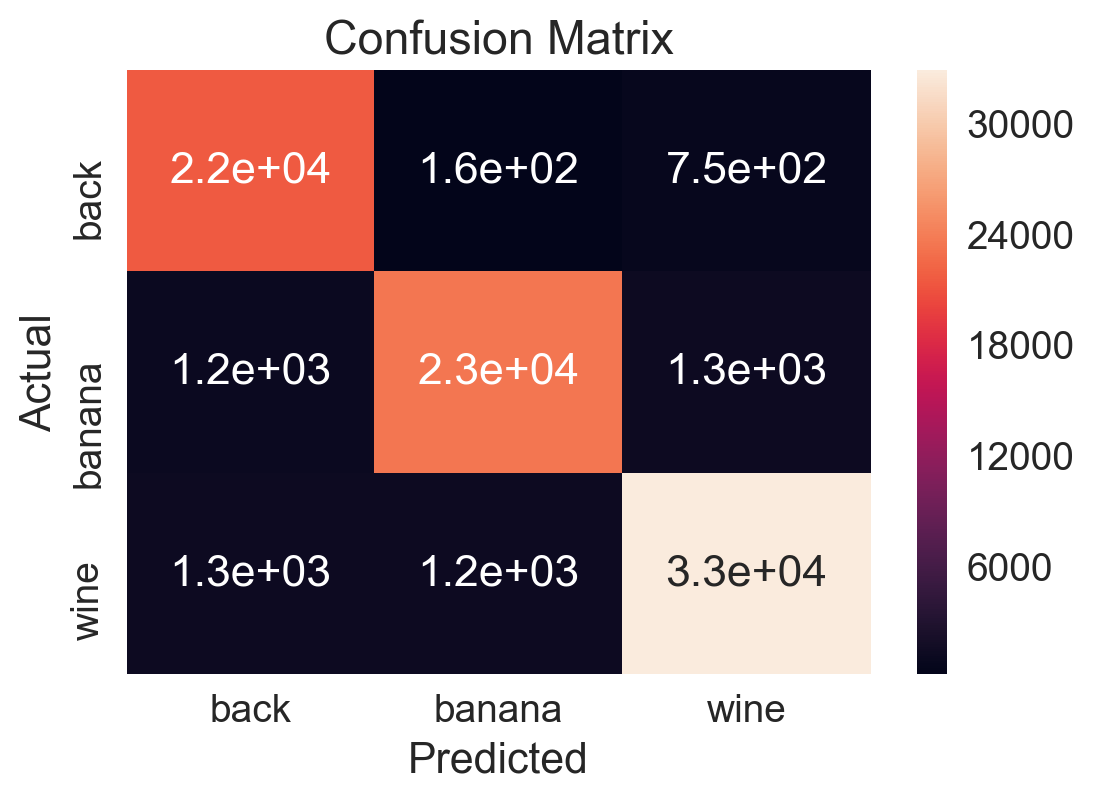

In [48]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))
class_set = np.asarray(sorted(set(y))) #las hipótesis posibles
class_set[class_set=="background"]="back"
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test, predict_test), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()

             precision    recall  f1-score   support

 background       0.90      1.00      0.95     45297
     banana       0.98      0.94      0.96     52544
       wine       0.98      0.94      0.96     72140

avg / total       0.96      0.96      0.96    169981

             precision    recall  f1-score   support

 background       0.90      1.00      0.95     22504
     banana       0.97      0.95      0.96     25897
       wine       0.98      0.94      0.96     35322

avg / total       0.96      0.96      0.96     83723



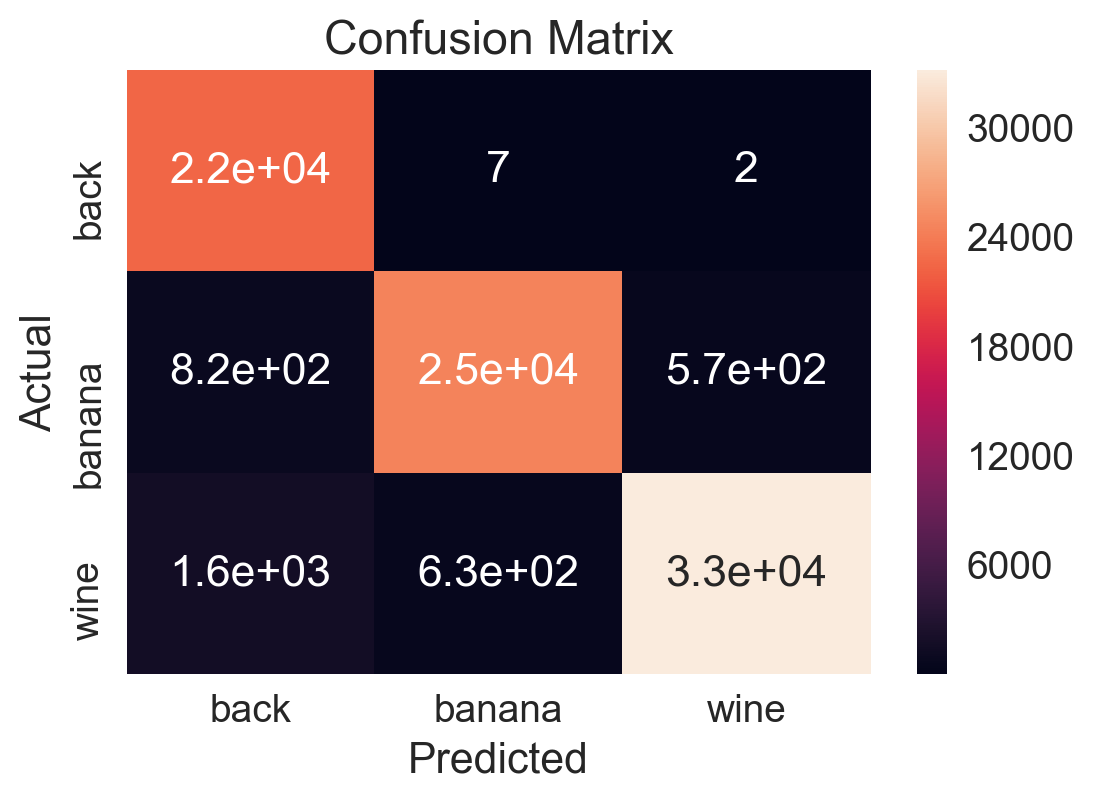

In [50]:

x_new = x[x.columns.drop(list(df.filter(regex='(Temp)|(Hum)')))]
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train_new,y_train_new)

predict_train_new = mlp.predict(x_train_new)
predict_test_new = mlp.predict(x_test_new)

print(classification_report(y_train_new, predict_train_new))
print(classification_report(y_test_new, predict_test_new))
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test_new, predict_test_new), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()


             precision    recall  f1-score   support

 background       0.90      1.00      0.95     22504
     banana       0.97      0.95      0.96     25897
       wine       0.98      0.94      0.96     35322

avg / total       0.96      0.96      0.96     83723

             precision    recall  f1-score   support

 background       0.90      0.96      0.93     22504
     banana       0.95      0.91      0.92     25897
       wine       0.94      0.93      0.94     35322

avg / total       0.93      0.93      0.93     83723

0.9306044933889135


<function matplotlib.pyplot.show(close=None, block=None)>

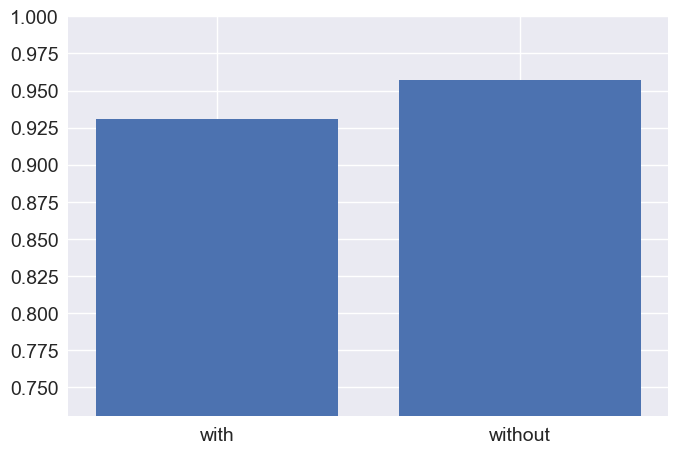

In [64]:
print(classification_report(y_test_new, predict_test_new))
print(classification_report(y_test, predict_test))
plt.rcParams['figure.dpi'] = 100
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_test))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["with", "without"]
values = [accuracy_score(y_test, predict_test), accuracy_score(y_test_new, predict_test_new)]
ax.bar(langs, values)
plt.yticks(np.arange(0, 1.1, 0.025))
ax.set(ylim=[min(values)-0.2, 1])
plt.show
